In [108]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# use paper style
style = "/home/gleung/scripts/styles/bee-paperlight.mplstyle"
# style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
plt.style.use(style)

# palettable default colors
from palettable.cartocolors.qualitative import Prism_8

prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = "#303039"
bg = "white"
lcol = "black"

from palettable.cmocean.sequential import Ice_20

cloud = mcolors.ListedColormap(Ice_20.mpl_colors[4:])
cloud.set_bad(Ice_20.mpl_colors[4])
cloud.set_under(Ice_20.mpl_colors[4])

# set default font
font_dir = ["/home/gleung/scripts/futura"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams["font.family"] = "Futura"

import re

In [109]:
import os
import pandas as pd
import numpy as np
import xarray as xr

# Task 1: initialize perturbation

In [103]:
dataPath = "task1/"

path = f"{dataPath}/hw3_timestep1.txt"

In [148]:
def read_mac_output(path):
    coords = []
    datas = []
    names = []

    with open(path) as file:
        file = file.readlines()

        breaks = []

        for i, f in enumerate(file):
            if "var" in f:
                breaks.append((i, f.strip().strip("var ")))
            elif "zsn" in f:
                zs = np.array(file[i + 1].split(", "), dtype="float")
            elif "xsn" in f:
                xs = np.array(file[i + 1].split(", "), dtype="float")
        for i in range(len(breaks)):
            name = breaks[i][1].strip("var")

            start = breaks[i][0] + 1
            if i < len(breaks) - 1:
                stop = breaks[i + 1][0]
            else:
                stop = len(file)

            data = file[start:stop]
            data = np.array([d.strip().split(",") for d in data], dtype="float")

            datas.append(data)
            names.append(name)

    ds = xr.Dataset(
        data_vars={names[i]: (["x", "z"], datas[i]) for i in range(len(names))},
        coords={"x": xs, "z": zs},
    )

    return ds

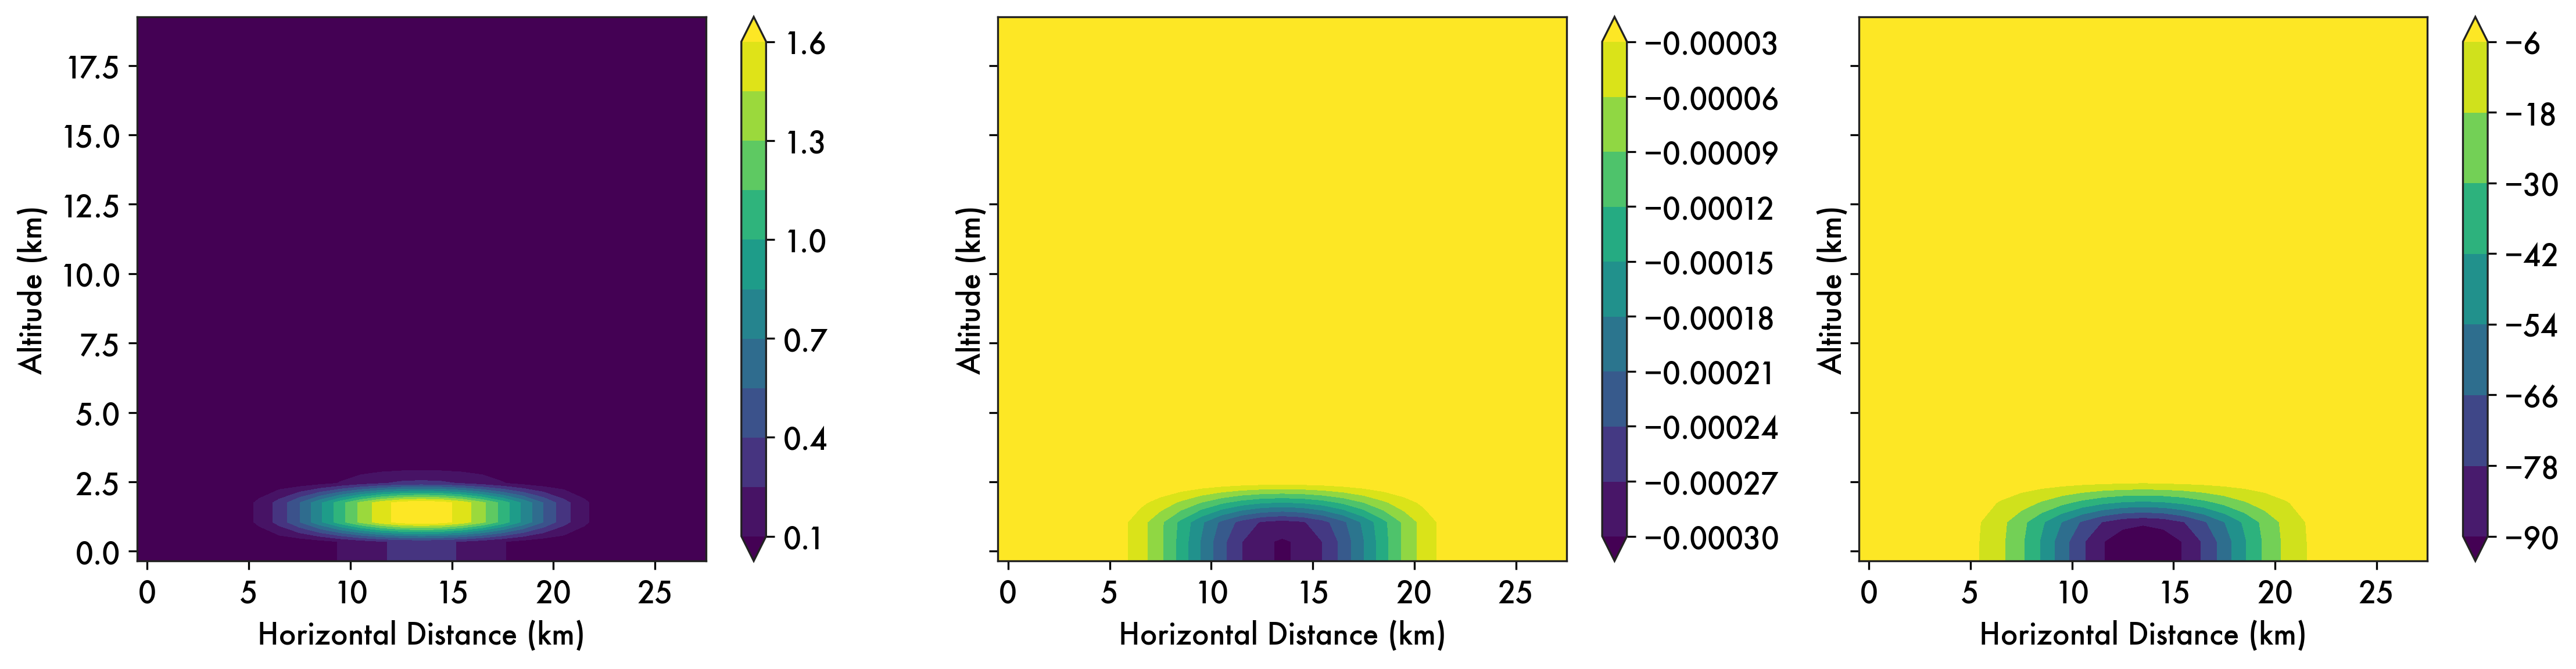

In [147]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 4))

for ax, var, levels in zip(
    axes,
    [
        "THP_pres",
        "PIP_pres",
        "PP_pres",
    ],
    [np.linspace(0.1, 1.6, 11), 11, np.linspace(-90, -6, 8)],
):
    c = ax.contourf(
        ds.x / 1000, ds.z / 1000, ds[var].T, levels=levels, extend="both"
    )
    plt.colorbar(c, ax=ax)

    ax.set_ylabel("Altitude (km)")
    ax.set_xlabel("Horizontal Distance (km)")

# Task 2

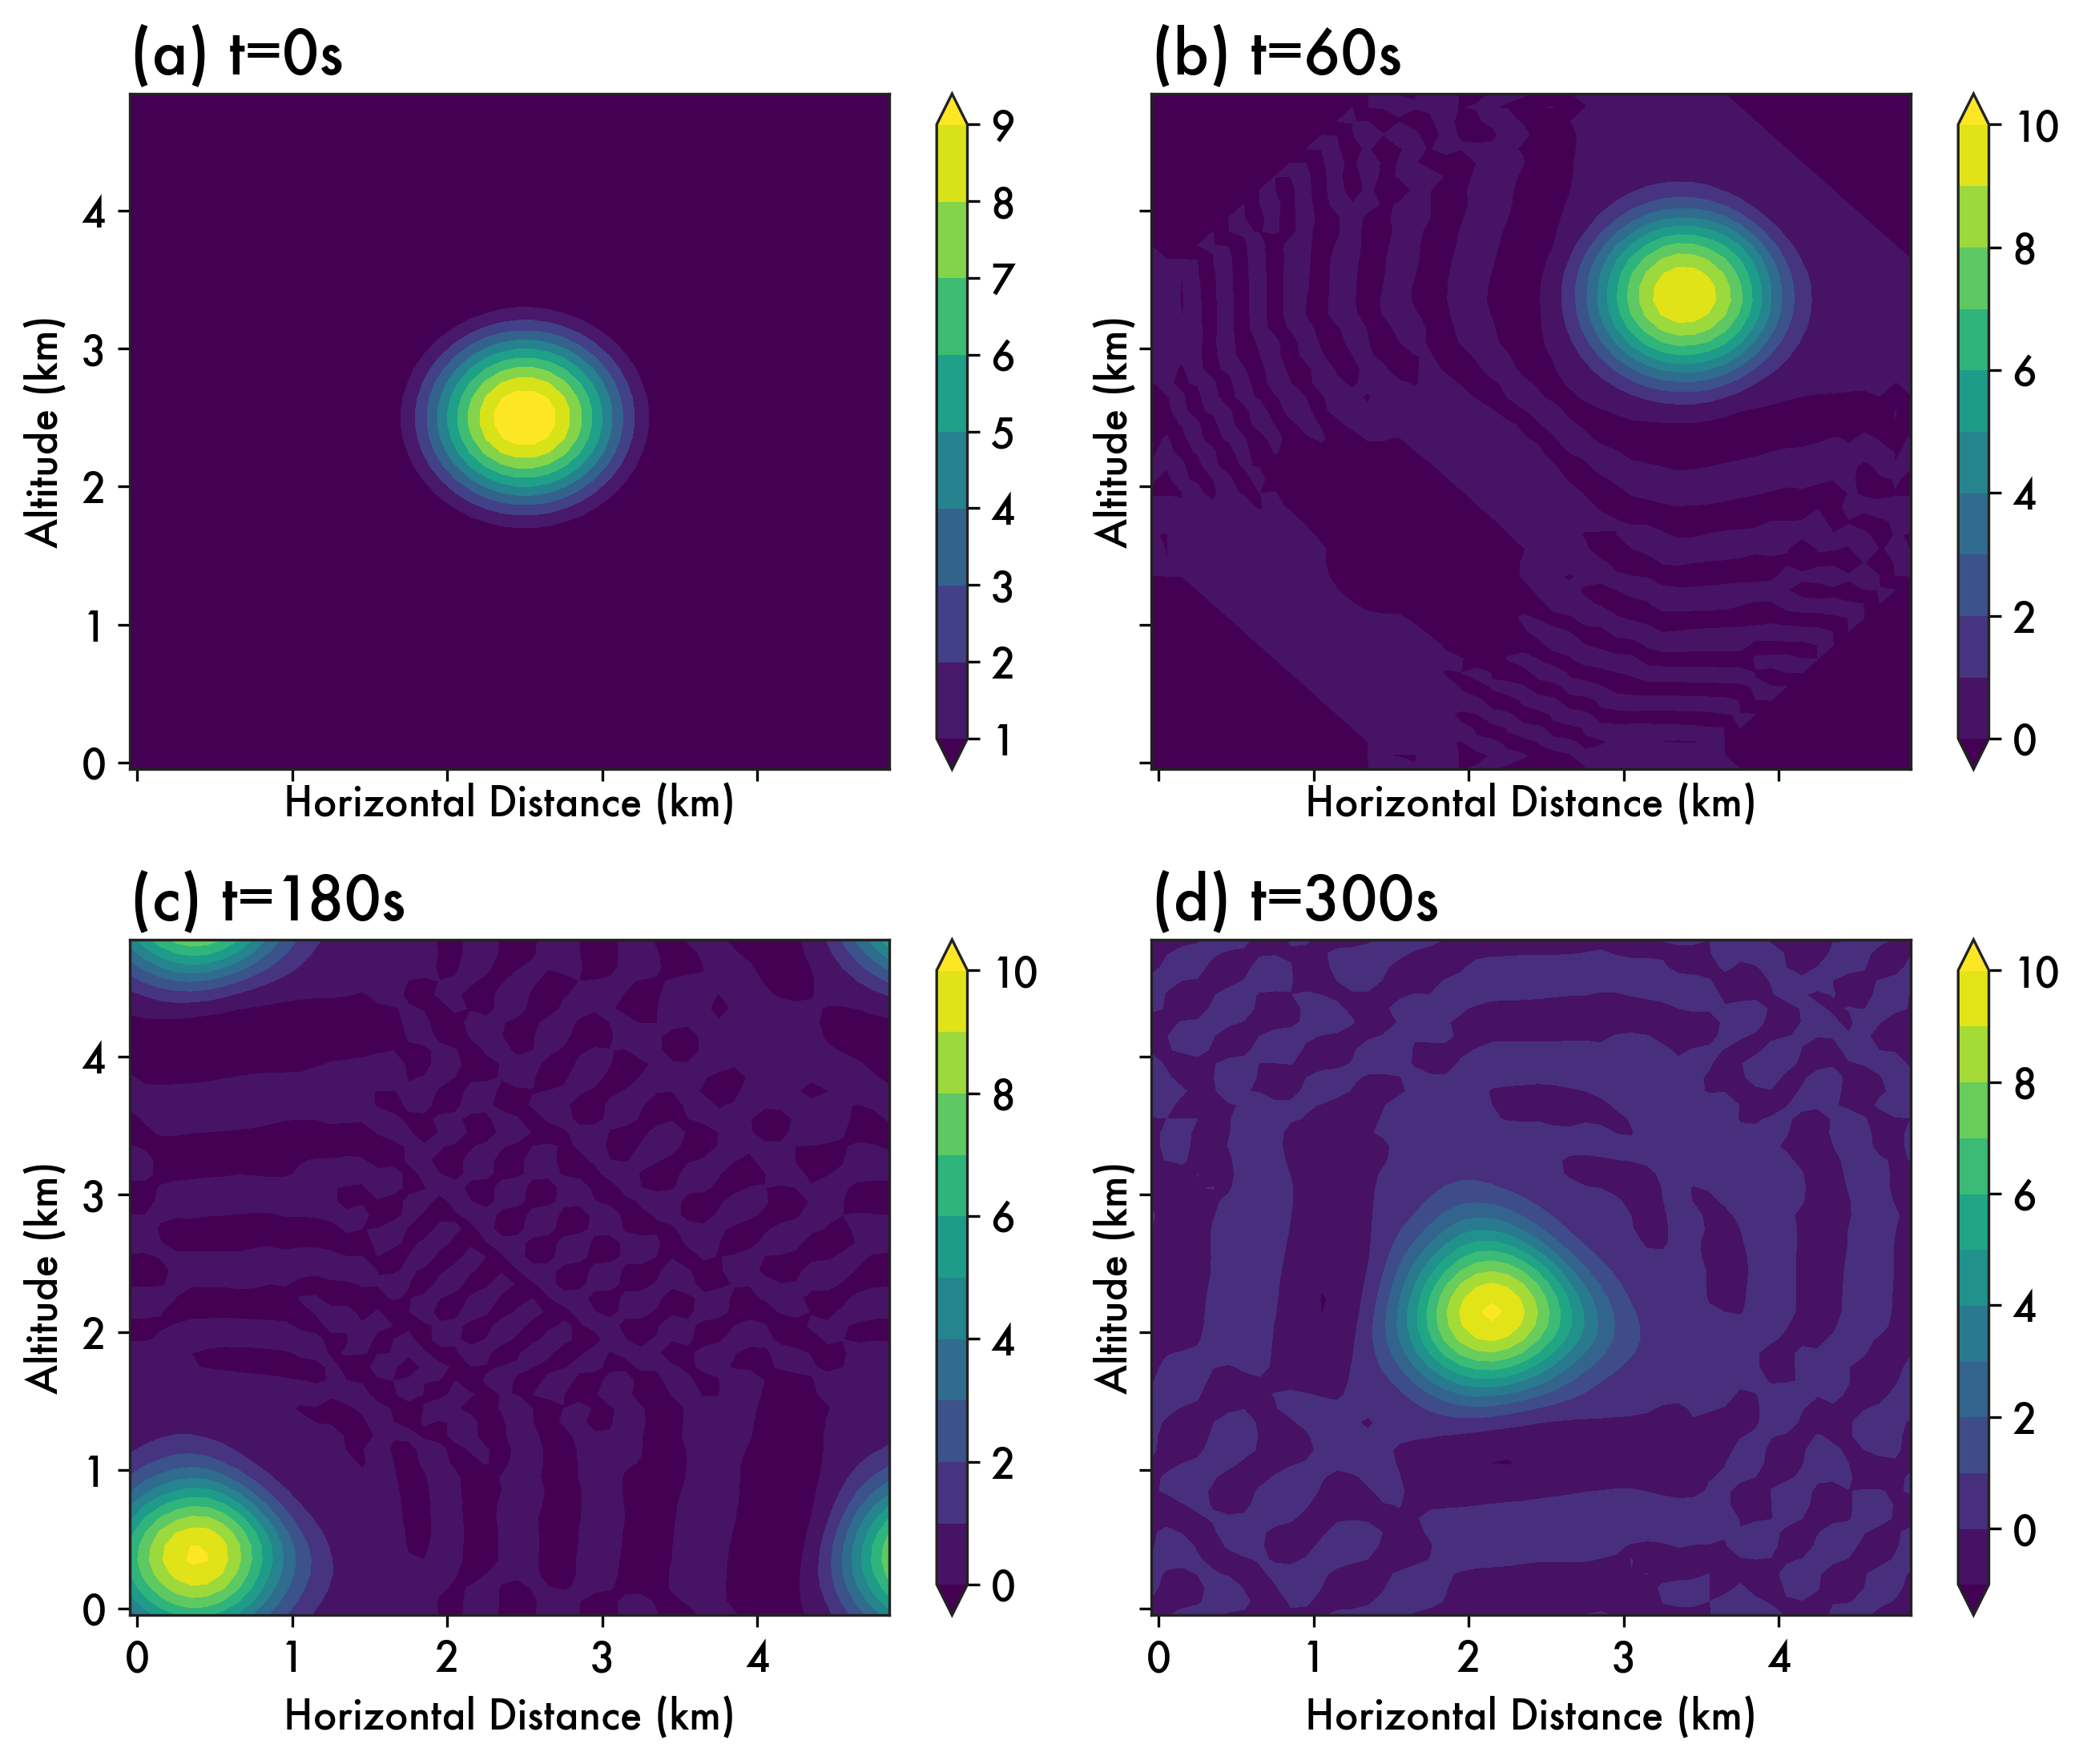

In [188]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 7.5))

axes = axes.flatten()

for i, ax, title in zip(
    [3, 60, 180, 300],
    axes,
    ["(a) t=0s", "(b) t=60s", "(c) t=180s", "(d) t=300s"],
):
    path = f"task2/hw3_output_timestep_{(i//3)}.txt"

    ds = read_mac_output(path)

    if i == 3:
        var = "UP_past"
    else:
        var = "UP_pres"

    c = ax.contourf(
        ds.x / 1000, ds.z / 1000, ds[var].T, levels=11, extend="both"
    )
    plt.colorbar(c, ax=ax)

    ax.set_ylabel("Altitude (km)")

    ax.set_xlabel("Horizontal Distance (km)")

    ax.set_title(title)